## Pretrained network
check the availability of torch

In [1]:
import torch
torch.cuda.is_available()

True

Let's load up and run two networks: first AlexNet, one of the early breakthrough networks for image recognition; and then a residual network, ResNet for short.

The predefined models can be found in

In [4]:
from torchvision import models

# dir(models)

resnet101 returns an instance of ResNet with 101 layers. We'll now turn our attention to AlexNet.

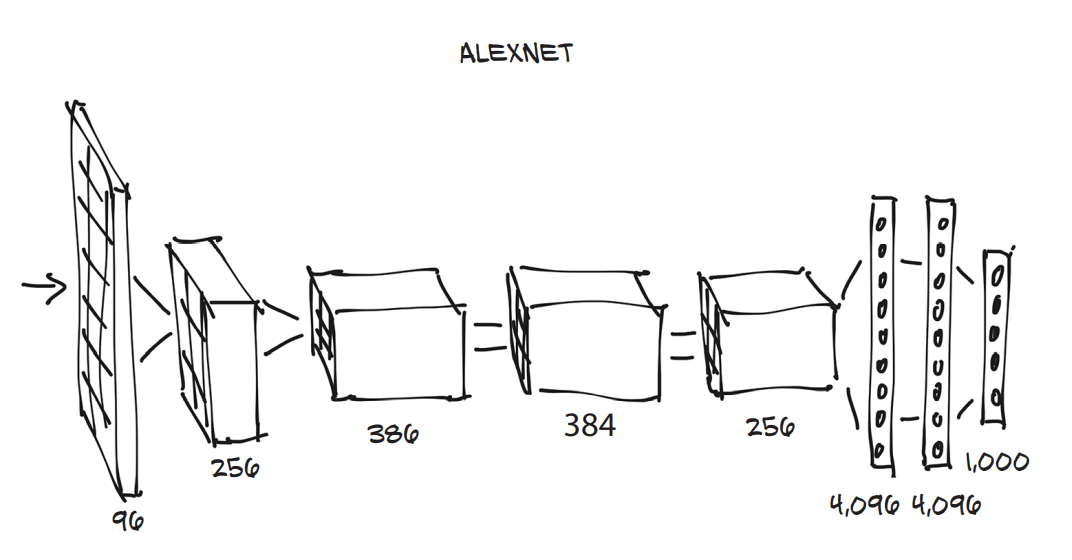

In [13]:
from IPython.display import Image

Image(filename='alexnet.png', height=1070, width = 560)

In order to run the AlexNet architecture on an input image, we can create an instance of the AlexNet class.

In [15]:
# class
alexnet = models.AlexNet()

We'll pass an argument that will instruct the function to download the weights of resnet101 trained on the ImageNet dataset, with 1.2 million and 1000 categories:

In [19]:
resnet = models.resnet101(pretrained=True)
# resnet

We have to preprocess the input images so they are the right size and so that their values sit roughly in the same numerical range. The torchvision module provides $transforms$, which allow us to quickly define pipelines of basic preprocessing functions:

In [21]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225])
])

1. Scale the input image to 256 * 256
2. Crop the image to 224 * 224 around the center
3. Transform to a tensor. In this case, a 3D array with color height and width
4. Normalize image's RGB components so that they have defined means and standard deviations

Now, we can grab a pic of dog, preprocess it, and then see what ResNet thinks of it.

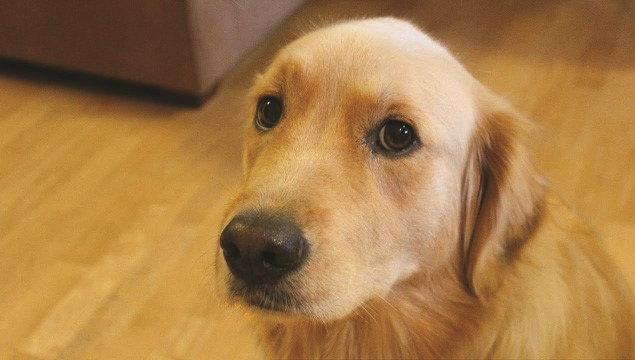

In [26]:
from PIL import Image

img = Image.open("bobby.jpg")
img.show()

Next, we pass the image through our preprocessing pipeline:

In [30]:
import torch

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

The process of running a trained model on new data is called _inference_ in deep learning circles. In order to do inference, we need to put the network in eval mode:

In [ ]:
# change to eval mode
resnet.eval()

Now that _eval_ has been set, we're ready for inference.

In [34]:
out = resnet(batch_t)
# out

To see the list of predicted labels, let's load the file containing the 1000 labels for the ImageNet dataset classes:

In [49]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
    
_, index = torch.max(out, 1)

Here, index is not a plain Python number, but a one-dimensional tensor.

In [50]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('207, golden_retriever', 95.70716094970703)

In this case, the model is 96% certain that it knows what it's looking at is a golden retriever.